<a href="https://colab.research.google.com/github/Dcorder123/Estudo_Dirigido_Controle_Automacao_2025.2/blob/main/Controle_e_Automa%C3%A7%C3%A3o_cap_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

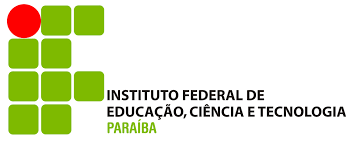

<center>

INSTITUTO FEDERAL DE CIÊNCIA E TECNOLOGIA DA PARAÍBA

CAMPUS CAMPINA GRANDE

BACHARELADO EM ENGENHARIA DA COMPUTAÇÃO

DISCIPLINA: CONTROLE E AUTOMAÇÃO

PROFESSOR: MOACY PEREIRA DA SILVA

<center>

<br>
<br>
<br>

**ESTUDO DIRIGIDO DA DISCIPLINA: CONTROLE E AUTOMAÇÃO**

<br>

**Entrega 02**

<br>
<br>

Daniel Barbosa Vasconcelos

<center>

<br>
<br>
<br>

27 de novembro de 2025 <br>
Campina Grande, PB

# Resumo : Capítulo 10 - Projeto de Sistemas de Controle com Realimentação
### Fonte: Sistemas de Controle Modernos (Dorf & Bishop)

Neste capítulo, o foco muda da **análise** (observar o comportamento) para o **projeto** (modificar o comportamento). O objetivo é adicionar componentes (compensadores) ao sistema para que ele atenda a especificações rigorosas de desempenho, como tempo de resposta, sobrepasso e erro em regime estacionário.





## 1. Abordagens de Projeto
O projeto de controle envolve o ajuste dos parâmetros do sistema ou a adição de novos subsistemas para alterar a dinâmica da planta.
* **Compensação em Cascata:** O controlador $G_c(s)$ é colocado em série com a planta $G(s)$ no caminho direto.
* **Compensação por Realimentação:** O controlador é colocado no caminho de realimentação (menos comum em projetos introdutórios).
* **Objetivo:** Alterar o Lugar das Raízes (LGR) para que ele passe por pólos de malha fechada desejados ($s_d$) que satisfaçam os requisitos de desempenho (ex: $\zeta, \omega_n$).


## 2. Redes de Compensação (O "Trio" Clássico)
Os compensadores dinâmicos introduzem pólos e zeros adicionais para remodelar o LGR.






### A. Compensação de Avanço de Fase (Lead)
Utilizado para melhorar a **estabilidade** e a **velocidade** (resposta transitória).
* **Função de Transferência:**
    $$G_c(s) = K \frac{s+z}{s+p}, \quad |z| < |p|$$
    *(O zero está mais próximo da origem do que o pólo).*
* **Efeito:** Adiciona ângulo de fase positivo. "Empurra" o LGR para a esquerda, aumentando o amortecimento e a frequência natural.
* **Aplicação:** Sistemas que precisam de resposta rápida e baixo sobrepasso.



### B. Compensação de Atraso de Fase (Lag)
Utilizado para melhorar o **erro em regime estacionário** sem degradar significativamente a estabilidade.
* **Função de Transferência:**
    $$G_c(s) = K \frac{s+z}{s+p}, \quad |z| > |p|$$
    *(O pólo está muito próximo da origem, e o zero logo atrás).*
* **Efeito:** Aumenta o ganho em baixas frequências (ganho DC) para reduzir o erro, mantendo a resposta transitória quase inalterada.
* **Aplicação:** Sistemas que exigem alta precisão (erro zero ou muito baixo).




### C. Compensação Avanço-Atraso (Lead-Lag)
Combina os benefícios de ambos: resposta rápida (Avanço) e precisão estacionária (Atraso).
* **Estrutura:** Essencialmente um compensador de avanço em série com um de atraso.

## 3. Projeto via Lugar das Raízes (Root Locus)
O procedimento geométrico para projetar um compensador de Avanço (Lead) é:

1.  **Determinar Pólos Desejados:** Traduzir especificações (ex: $T_s < 2s$, $UP\% < 5\%$) em uma localização de pólo dominante $s_d$.
2.  **Teste de Ângulo:** Verificar se $s_d$ pertence ao LGR original. Se não, calcular a **deficiência de ângulo** $\phi$.
    $$\phi = 180^\circ - \sum \angle \text{zeros} + \sum \angle \text{pólos}$$
3.  **Posicionar Pólo e Zero:** Escolher a posição do zero ($z$) e do pólo ($p$) do compensador tal que eles contribuam exatamente com o ângulo $\phi$ necessário para satisfazer a condição de ângulo em $s_d$.
4.  **Calcular Ganho K:** Usar a condição de módulo para encontrar o valor de $K$.

## 4. Controladores PID no LGR
O capítulo conecta os compensadores clássicos com a estrutura PID industrial:
* **PD (Proporcional-Derivativo):** É um "Avanço ideal" (zero puro). Melhora estabilidade.
* **PI (Proporcional-Integral):** É um "Atraso ideal" (pólo na origem). Zera o erro estacionário, mas adiciona instabilidade de fase.
* **PID:** Combina ambos para otimizar transitório e estacionário.

---
*Baseado no Capítulo 10 de Dorf, Richard C. & Bishop, Robert H. "Sistemas de Controle Modernos", 8ª Edição.*

###  Parte 02: Exemplos de Simulação

Abaixo estão os códigos para simular os conceitos de **Compensação de Avanço (Lead)** e **Atraso (Lag)**. Copie e cole no seu notebook.



In [1]:
!pip install control
import numpy as np
import matplotlib.pyplot as plt
import control as ct

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.3/578.3 kB 22.7 MB/s eta 0:00:00


#### Exemplo 1: Projeto de Compensador de Avanço (Lead)

**Objetivo:** Estabilizar um sistema instável ($1/s^2$) e garantir um amortecimento específico. A planta é um "duplo integrador" (comum em satélites e robótica).


/usr/local/lib/python3.12/dist-packages/control/rlocus.py:202: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(


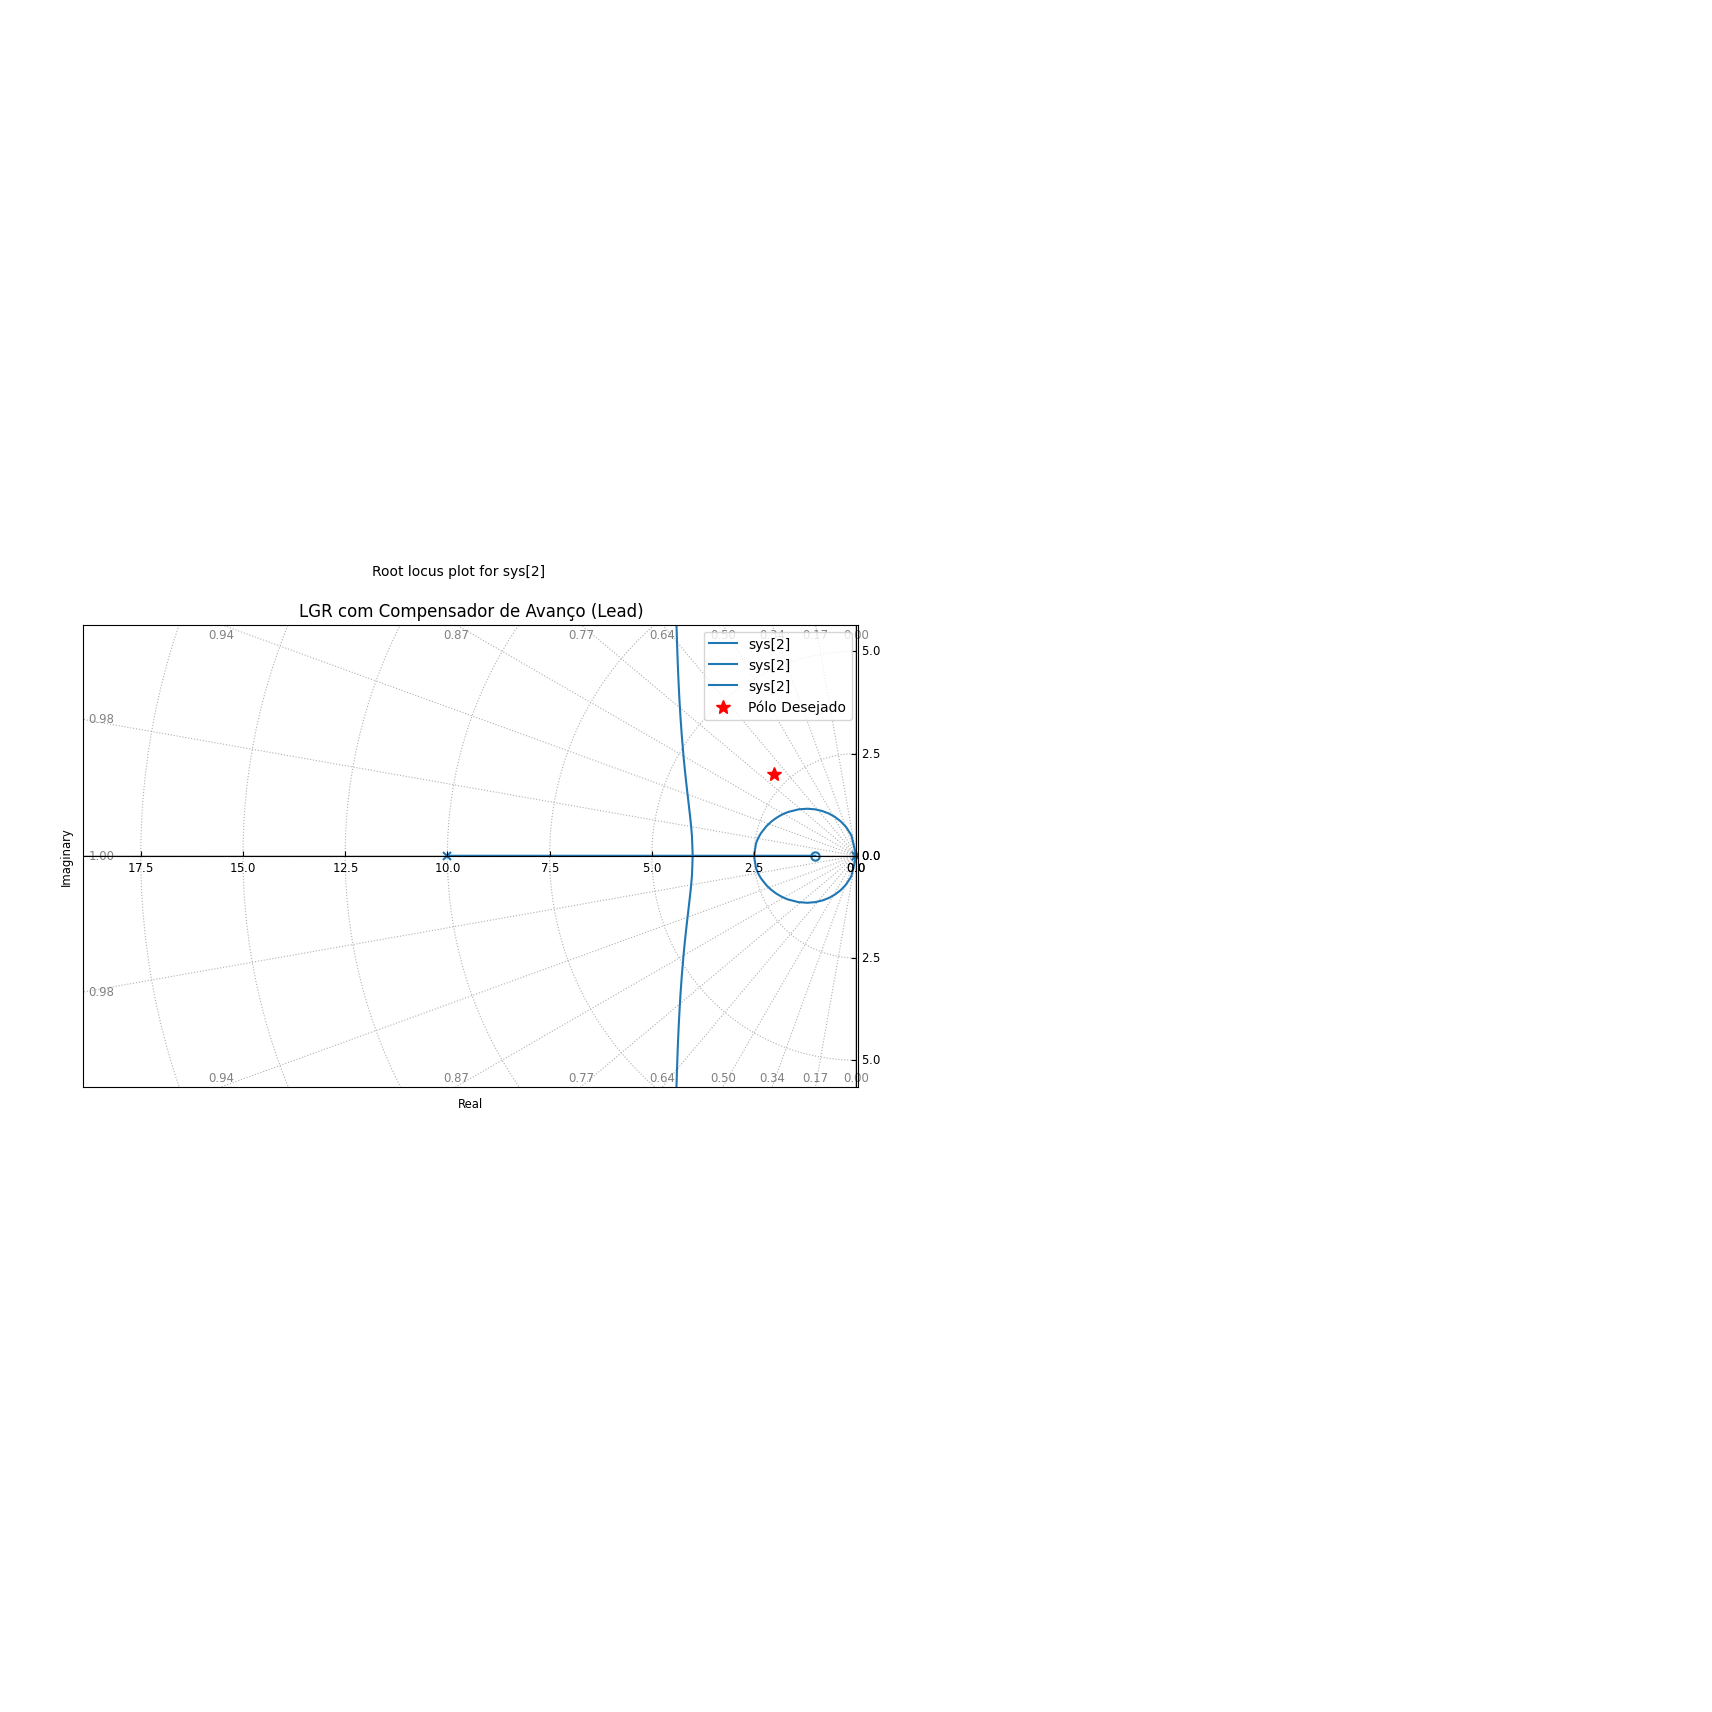

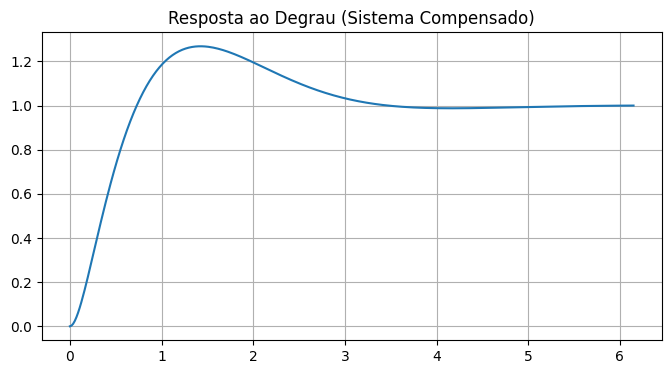

In [2]:
# Planta: G(s) = 1/s^2 (Marginalmente estável/Instável)
G = ct.tf([1], [1, 0, 0])

# Requisito: Pólos dominantes em -2 +/- j2 (Zeta = 0.707, wn = 2.82)
# O sistema original não passa por esses pontos. Precisamos de Avanço.

# Compensador de Avanço (Lead)
# Zero em -1 (adiciona fase), Pólo em -10 (filtra ruído/limita ganho)
Gc_lead = ct.tf([1, 1], [1, 10])

# Sistema Compensado em Malha Aberta
L = Gc_lead * G

plt.figure(figsize=(10, 6))
# Plotar LGR
rlist, klist = ct.root_locus(L, plot=True, grid=True)

# Marcar o ponto de projeto desejado (aproximado)
plt.plot([-2], [2], 'r*', markersize=10, label='Pólo Desejado')
plt.title("LGR com Compensador de Avanço (Lead)")
plt.legend()
plt.show()

# Resposta ao Degrau (Malha Fechada) com K escolhido (ex: K=20)
K = 20
sys_cl = ct.feedback(K*L, 1)
t, y = ct.step_response(sys_cl)

plt.figure(figsize=(8, 4))
plt.plot(t, y)
plt.title("Resposta ao Degrau (Sistema Compensado)")
plt.grid()
plt.show()

#### Exemplo 2: Compensador de Atraso (Lag) para Erro

**Objetivo:** Reduzir o erro estacionário sem alterar muito o transitório.


In [3]:
# Planta Estável: G(s) = 1 / (s+1)(s+2)
G = ct.tf([1], [1, 3, 2])

# Compensador de Atraso (Lag)
# Pólo muito próximo da origem (-0.01) e Zero próximo (-0.1)
# Isso aumenta o ganho DC em 10x (z/p = 0.1/0.01 = 10)
Gc_lag = ct.tf([1, 0.1], [1, 0.01])

L_orig = G
L_comp = Gc_lag * G

print("Ganho DC Original:", ct.dcgain(L_orig))
print("Ganho DC Compensado:", ct.dcgain(L_comp))
# Note que o ganho DC aumentou, o que reduz o erro de regime (e_ss = 1 / (1+Kp))

Ganho DC Original: 0.5
Ganho DC Compensado: 5.0










### Parte 03: Aplicações Industriais (Indústria 4.0)

Como o Capítulo 10 se traduz no chão de fábrica moderno:

1.  **Usinagem CNC de Alta Velocidade (Lead/PD):**

      * **Aplicação:** Máquinas que cortam metal em alta velocidade precisam mudar de direção instantaneamente sem vibrar.
      * **Solução:** O compensador de **Avanço (Lead)** é usado para "antecipar" o erro, permitindo que os servomotores reajam mais rápido (aumentando a largura de banda) sem ultrapassar a posição (overshoot), garantindo precisão micrométrica.

2.  **Controle de Tensão em Bobinadeiras (Lag/PI):**

      * **Aplicação:** Em indústrias de papel ou aço, manter a tensão constante do material enquanto o rolo aumenta de diâmetro é crítico.
      * **Solução:** O erro de tensão deve ser zero para não rasgar o material. Usa-se compensação de **Atraso (Lag)** ou PI para garantir ganho infinito em corrente contínua (erro zero), aceitando uma resposta um pouco mais lenta às perturbações.

3.  **Estabilização de Câmeras em Drones (Gimbal):**

      * **Aplicação:** Manter a câmera estável enquanto o drone vibra e se move.
      * **Solução:** Compensadores **Lead-Lag**. O "Lead" estabiliza os movimentos rápidos (vibração dos motores) e o "Lag" corrige desvios lentos de horizonte, garantindo uma imagem perfeitamente nivelada.